# 🐚🐧 Penguin and Abalone Classifier 🐧🐚
Using different machine learning algorithms and different data sets, this notebook attempts to predict the species of a penguin given its features and the sex of an abalone given its features.

## Environment Setup

Before running this notebook, make sure to run the following command to install all of the required libraries needed to execute the code properly.

`pip install -r requirements.txt --user`

**NOTE:** However, if you installed your Python installation globally, e.g. inside C:\Program Files\Python311 (and not in C:\User\%Appdata\Python311), remove the ***--user*** argument.

## Imports and Declarations

In [1]:
# data analysis and manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# model
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.neural_network import MLPClassifier as MLP

# data postprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Tree visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree


# score tracking
accuracy_scores = []
macro_f1_scores = []
weighted_f1_scores = []


## Dataset

In [2]:
# read data from file
penguin = pd.read_csv('penguins.csv')
abalone = pd.read_csv('abalone.csv')

## Preprocessing - Penguin and Abalone Dataset

In [3]:
label_encoder = LabelEncoder()
penguin_encoded = penguin.apply(label_encoder.fit_transform)
print ("Raw Penguin Data")
print (penguin_encoded.head())
print ()
label_encoder = LabelEncoder()
abalone_encoded = abalone.apply(label_encoder.fit_transform)
print ("Raw Abalone Data")
print (abalone_encoded.head())

Raw Penguin Data
   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2                41               56                  5   
1        0       2                44               43                 10   
2        0       2                50               49                 19   
3        0       2                21               62                 17   
4        0       2                43               73                 14   

   body_mass_g  sex  
0           30    1  
1           32    0  
2           11    0  
3           18    0  
4           26    1  

Raw Abalone Data
   Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0     0            96        77      32         1730           1143   
1     2            85        68      29         1195            777   
2     2            67        52      21          630            437   
3     0           105        78      32         1994           1089   
4     2            90

## Preprocessing - One Hot Encoding

In [4]:
penguin_hot_encoder = OneHotEncoder()
penguin_hot_encoder.fit(penguin_encoded)
penguin_hot_labels = penguin_hot_encoder.transform(penguin_encoded).toarray()
print ("Penguin data set shape: ", penguin_encoded.shape)
print ("Penguin hot labels shape: ", penguin_hot_labels.shape)
print ()

abalone_hot_encoder = OneHotEncoder()
abalone_hot_encoder.fit(abalone_encoded)
abalone_hot_labels = abalone_hot_encoder.transform(abalone_encoded).toarray()
print ("Abalone data set shape: ", abalone_encoded.shape)
print ("Abalone hot labels shape: ", abalone_hot_labels.shape)

Penguin data set shape:  (333, 7)
Penguin hot labels shape:  (333, 397)

Abalone data set shape:  (4177, 9)
Abalone hot labels shape:  (4177, 6077)


## Preprocessing - Double Check for Missing Values

In [5]:
print('Penguin data set - column with missing value:')
print(penguin.isna().sum())
print()
print('Abalone data set - column with missing value:')
print(abalone.isna().sum())

Penguin data set - column with missing value:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Abalone data set - column with missing value:
Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


## Charting

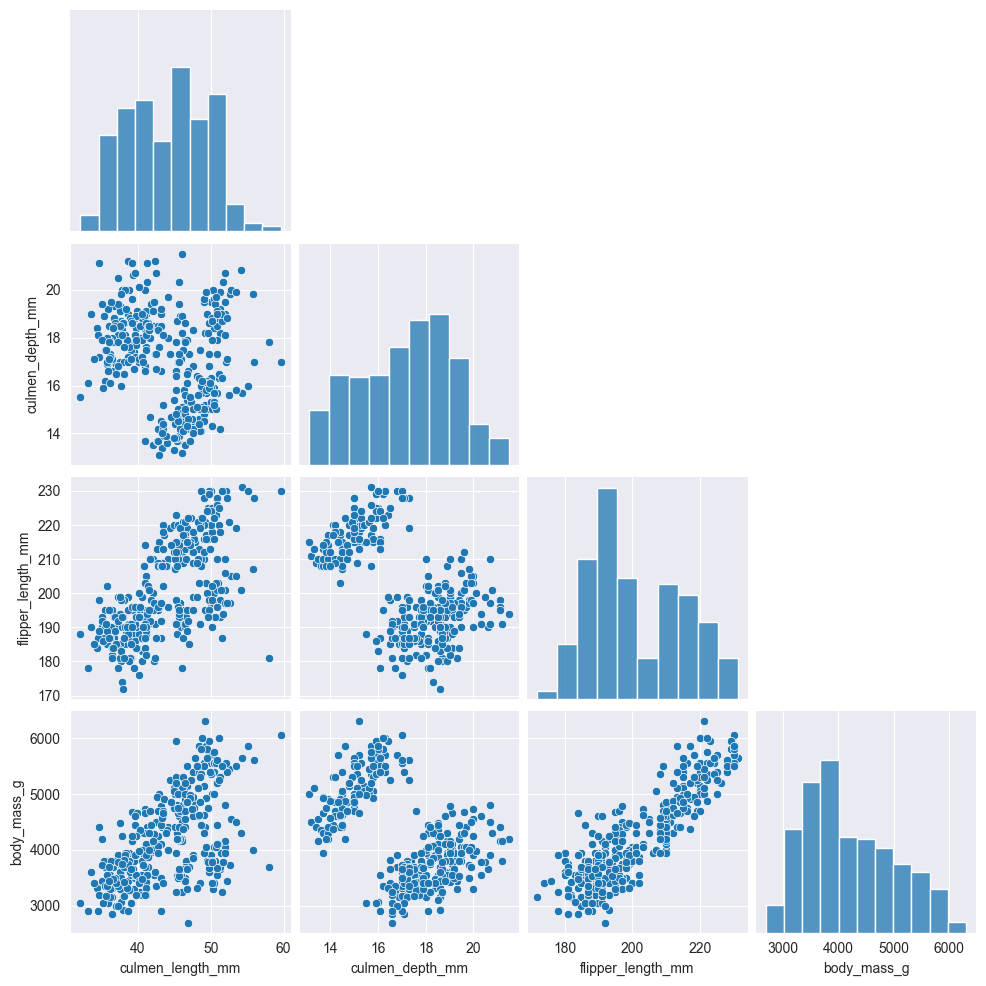

Error in callback <function flush_figures at 0x0000023FF6B26200> (for post_execute):


KeyboardInterrupt: 

In [6]:
# Exploratopry Data Analysis
sns.pairplot(penguin, corner=True)
plt.savefig('penguin_pairplot.png')

sns.pairplot(abalone, corner=True)
plt.savefig('abalone_pairplot.png')

## Data Splitting

In [ ]:
# split data into training (80%) and testing (20%) sets with random state 0
penguinXtrain, penguinXtest, penguinYtrain, penguinYtest = train_test_split(penguin_encoded, penguin_hot_labels, test_size=0.2, random_state=0)
print ("Penguin total X train: ", len(penguinXtrain))
print ("Penguin total X test: ", len(penguinXtest))
print ("Penguin total Y train: ", len(penguinYtrain))
print ("Penguin total Y test: ", len(penguinYtest))
print()
abaloneXtrain, abaloneXtest, abaloneYtrain, abaloneYtest = train_test_split(abalone_encoded, abalone_hot_labels, test_size=0.2, random_state=0)
print ("Abalone total X train: ", len(abaloneXtrain))
print ("Abalone total X test: ", len(abaloneXtest))
print ("Abalone total Y train: ", len(abaloneYtrain))
print ("Abalone total Y test: ", len(abaloneYtest))

## Base Decision Tree (Penguin)

In [ ]:
# For Penguin
BasePenguinDtree =  DecisionTreeClassifier() # Create a decision tree classifier with default values
BasePenguinDtree.fit(penguinXtrain, penguinYtrain) # Fit the model with training data

# To check for accuracy, use the score function.
# accuracy = BasePenguinDtree.score(penguinXtest, penguinYtest)
# print("Base Penguin Decision Tree Accuracy: ", accuracy)

plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(BasePenguinDtree, filled=True, rounded=True, class_names=['Adelie', 'Chinstrap', 'Gentoo'], feature_names=penguin.columns,fontsize=10) # Plot the tree
plt.show() # Show the plot
# plt.savefig('Penguin_BDT.png') # Save the plot to a file


## Base Decision Tree (Abalone)

In [ ]:
# For Abalone
BaseAbaloneDtree =  DecisionTreeClassifier() # Create a decision tree classifier with default values
BaseAbaloneDtree.fit(abaloneXtrain, abaloneYtrain) # Fit the model with training data

# To check for accuracy, use the score function.
# accuracy_abalone = BaseAbaloneDtree.score(abaloneXtest, abaloneYtest)
# print("Base Abalone Decision Tree Accuracy: ", accuracy_abalone)

plt.figure(figsize=(20,10),dpi=300)  # Adjust the figure size as needed
plot_tree(BaseAbaloneDtree, filled=True, rounded=True, class_names=['Adelie', 'Chinstrap', 'Gentoo'], feature_names=abalone.columns,fontsize=10,max_depth=3) # Plot the tree
plt.show() # Show the plot
# plt.savefig('Abalone_BDT.png') # Save the plot to a file

## Top Decision Tree (Penguin)

In [ ]:
# INSERT CODE HERE
# Decision Tree Classifier
# For Penguin
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5,None],   # Define the different values of max depth to try
    'min_samples_split': [2, 5, 10], # Define the different values of min samples split to try
}

TopPenguinDtree = DecisionTreeClassifier() # Create a decision tree classifier with default values
grid_search = GridSearchCV(TopPenguinDtree, grid_params, cv=5,scoring='accuracy') # Create a grid search object 5-fold cross validation and accuracy as the scoring method
grid_search.fit(penguinXtrain, penguinYtrain) # Fit the grid search with training data

TopPenguinDtree_best_params = grid_search.best_params_ # Get the best parameters
TopPenguinDtree_best_dtree = grid_search.best_estimator_ # Get the best estimator

print("Best parameters for Penguin Decision Tree: ", TopPenguinDtree_best_params) # Print the best parameters

# visualize the best decision tree
plt.figure(figsize=(20,10),dpi=300)  # Adjust the figure size as needed
plot_tree(TopPenguinDtree_best_dtree, filled=True, rounded=True, class_names=['Adelie', 'Chinstrap', 'Gentoo'], feature_names=penguin.columns,fontsize=10,max_depth=3) # Plot the tree
plt.show() # Show the plot
# plt.savefig('Penguin_BDT.png') # Save the plot to a file


## Top Decision Tree (Abalone)

In [ ]:
# INSERT CODE HERE
# For Abalone
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5,7],   # Define the different values of max depth to try
    'min_samples_split': [2, 5] # Define the different values of min samples split to try
}   
TopAbaloneDtree = DecisionTreeClassifier() # Create a decision tree classifier with default values
grid_search_abalone = GridSearchCV(TopAbaloneDtree, grid_params, cv=5,scoring='accuracy') # Create a grid search object 5-fold cross validation and accuracy as the scoring method
grid_search_abalone.fit(abaloneXtrain, abaloneYtrain) # Fit the grid search with training data

TopAbaloneDtree_best_params = grid_search_abalone.best_params_ # Get the best parameters
TopAbaloneDtree_best_dtree = grid_search_abalone.best_estimator_ # Get the best estimator

print("Best parameters for Abalone Decision Tree: ", TopAbaloneDtree_best_params) # Print the best parameters

# visualize the best decision tree
plt.figure(figsize=(20,10),dpi=300)  # Adjust the figure size as needed
plot_tree(TopAbaloneDtree_best_dtree, filled=True, rounded=True, class_names=['Adelie', 'Chinstrap', 'Gentoo'], feature_names=abalone.columns,fontsize=10,max_depth=3) # Plot the tree
plt.show() # Show the plot
# plt.savefig('Abalone_BDT.png') # Save the plot to a file


## Base MLP (Penguin)

In [ ]:
# Base MLP For Penguin

# change string value to numeric
penguin['species'] = pd.Categorical(penguin['species']).codes
penguin['island'] = pd.Categorical(penguin['island']).codes
penguin['sex'] = pd.Categorical(penguin['sex']).codes

#change dataframe to array
penguin_array = penguin.values

#split x and y (feature and target)
penguinXtrain = penguin_array[:,1:]
penguinYtrain = penguin_array[:,0]

#standardize
#palmer-penguin dataset has varying scales
scaler = StandardScaler()
penguinXtrain = scaler.fit_transform(penguinXtrain)

base_mlp_penguin = MLP(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', random_state=0)

# fit the model with training data
base_mlp_penguin.fit(penguinXtrain, penguinYtrain)

# predicting the species of penguins using the trained model
base_mlp_penguin_predicted = base_mlp_penguin.predict(penguinXtest)

# calculate scores
accuracy = accuracy_score(penguinYtest, base_mlp_penguin_predicted)
macro_f1 = f1_score(penguinYtest, base_mlp_penguin_predicted, average='macro')
weighted_f1 = f1_score(penguinYtest, base_mlp_penguin_predicted, average='weighted')

print("Base MLP Accuracy for Penguin: ", accuracy)
print("Base MLP Macro-average F1 for Penguin: ", macro_f1)
print("Base MLP Weighted-average F1 for Penguin: ", weighted_f1)

## Top MLP (Penguin)

In [ ]:
# Top MLP For Penguin

# change string value to numeric
penguin['species'] = pd.Categorical(penguin['species']).codes
penguin['island'] = pd.Categorical(penguin['island']).codes
penguin['sex'] = pd.Categorical(penguin['sex']).codes

#change dataframe to array
penguin_array = penguin.values

#split x and y (feature and target)
penguinXtrain = penguin_array[:,1:]
penguinYtrain = penguin_array[:,0]

#standardize
#palmer-penguin dataset has varying scales
scaler = StandardScaler()
penguinXtrain = scaler.fit_transform(penguinXtrain)

# Define the different values of hyperparameters to try
param_grid = {
    'activation': ['sigmoid', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10), (100,)],
    'solver': ['adam', 'sgd']
}

# Create a MLP classifier with default values
mlp_penguin = MLP(random_state=0)

# Create a grid search object
grid_search = GridSearchCV(mlp_penguin, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to find the best parameters
grid_search.fit(penguinXtrain, penguinYtrain)

# Get the best parameters and best estimator
best_params_mlp_penguin = grid_search.best_params_
best_mlp_penguin = grid_search.best_estimator_

print("Best parameters for Penguin MLP: ", best_params_mlp_penguin)

# Predict the species of penguins using the trained model
top_mlp_penguin_predicted = best_mlp_penguin.predict(penguinXtest)

# Calculate scores
accuracy = accuracy_score(penguinYtest, top_mlp_penguin_predicted)
macro_f1 = f1_score(penguinYtest, top_mlp_penguin_predicted, average='macro')
weighted_f1 = f1_score(penguinYtest, top_mlp_penguin_predicted, average='weighted')

print("Top MLP Accuracy for Penguin: ", accuracy)
print("Top MLP Macro-average F1 for Penguin: ", macro_f1)
print("Top MLP Weighted-average F1 for Penguin: ", weighted_f1)

## Base MLP (Abalone)

In [ ]:
# Base MLP For Abalone

# change string value to numeric
abalone['Type'] = pd.Categorical(abalone['Type']).codes

# change dataframe to array
abalone_array = abalone.values

# split x and y (feature and target)
abaloneXtrain = abalone_array[:,1:]
abaloneYtrain = abalone_array[:,0]

# standardize
scaler = StandardScaler()
abaloneXtrain = scaler.fit_transform(abaloneXtrain)

base_mlp_abalone = MLP(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', random_state=0)

# fit the model with training data
base_mlp_abalone.fit(abaloneXtrain, abaloneYtrain)

# predicting the species of abalone using the trained model
base_mlp_abalone_predicted = base_mlp_abalone.predict(abaloneXtest)

# calculate scores
accuracy_abalone = accuracy_score(abaloneYtest, base_mlp_abalone_predicted)
macro_f1_abalone = f1_score(abaloneYtest, base_mlp_abalone_predicted, average='macro')
weighted_f1_abalone = f1_score(abaloneYtest, base_mlp_abalone_predicted, average='weighted')

print("Base MLP Accuracy for Abalone: ", accuracy_abalone)
print("Base MLP Macro-average F1 for Abalone: ", macro_f1_abalone)
print("Base MLP Weighted-average F1 for Abalone: ", weighted_f1_abalone)

## Top MLP (Abalone)

In [ ]:
# Top MLP For Abalone

# change string value to numeric
abalone['Type'] = pd.Categorical(abalone['Type']).codes

# change dataframe to array
abalone_array = abalone.values

# split x and y (feature and target)
abaloneXtrain = abalone_array[:,1:]
abaloneYtrain = abalone_array[:,0]

# Define the different values of hyperparameters to try
param_grid = {
    'activation': ['sigmoid', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10), (100,)],
    'solver': ['adam', 'sgd']
}

# Create a MLP classifier with default values
mlp_abalone = MLP(random_state=0)

# Create a grid search object
grid_search = GridSearchCV(mlp_abalone, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to find the best parameters
grid_search.fit(abaloneXtrain, abaloneYtrain)

# Get the best parameters and best estimator
best_params_mlp_abalone = grid_search.best_params_
best_mlp_abalone = grid_search.best_estimator_

print("Best parameters for Abalone MLP: ", best_params_mlp_abalone)

# Predict the species of abalone using the trained model
top_mlp_abalone_predicted = best_mlp_abalone.predict(abaloneXtest)

# Calculate scores
accuracy = accuracy_score(abaloneYtest, top_mlp_abalone_predicted)
macro_f1 = f1_score(abaloneYtest, top_mlp_abalone_predicted, average='macro')
weighted_f1 = f1_score(abaloneYtest, top_mlp_abalone_predicted, average='weighted')

print("Top MLP Accuracy for Abalone: ", accuracy)
print("Top MLP Macro-average F1 for Abalone: ", macro_f1)
print("Top MLP Weighted-average F1 for Abalone: ", weighted_f1)

## Run Model n Times

In [ ]:
def run_multiple_times (num_runs, model, trueset, predictedset):
  """
  Runs the model n times and returns the accuracy, macro-average F1, and weighted-average F1 scores.
  """
  for i in range(num_runs):
    match model:
      case 'basemlp-abalone':
        print (f"Running Base-MLP Model {num_runs} times.")
        base_mlp_abalone.n_iter_ = 5
        base_mlp_abalone.fit(abaloneXtrain, abaloneYtrain)
        predictedset = base_mlp_abalone.predict(abaloneXtest)
      case 'topmlp-abalone':
        print (f"Running Top-MLP Model {num_runs} times.")
        mlp_abalone.n_iter_ = 5
        mlp_abalone.fit(abaloneXtrain, abaloneYtrain)
        predictedset = mlp_abalone.predict(abaloneXtest)
      case 'basemlp-penguin':
        print (f"Running Base-MLP Model {num_runs} times.")
        base_mlp_penguin.n_iter_ = 5
        base_mlp_penguin.fit(penguinXtrain, penguinYtrain)
        predictedset = base_mlp_penguin.predict(penguinXtest)
      case 'topmlp-penguin':
        print (f"Running Top-MLP Model {num_runs} times.")
        mlp_penguin.n_iter_ = 5
        mlp_penguin.fit(penguinXtrain, penguinYtrain)
        predictedset = mlp_penguin.predict(penguinXtest)

    # calculate accuracy, macro-average F1, and weighted-average F1
    accuracy = accuracy_score(trueset, predictedset)
    macro_f1 = f1_score(trueset, predictedset, average='macro')
    weighted_f1 = f1_score(trueset, predictedset, average='weighted')

    # append the scores to the corresponding lists
    accuracy_scores.append(accuracy)
    macro_f1_scores.append(macro_f1)
    weighted_f1_scores.append(weighted_f1)

  return accuracy, macro_f1, weighted_f1, accuracy_scores, macro_f1_scores, weighted_f1_scores

## Output Macro

In [ ]:
def output_macro (trueset, predictedset, model, dataset, hyperparameter, structure):
  accuracy, macro_f1, weighted_f1, accuracy_scores, macro_f1_scores, weighted_f1_scores = run_multiple_times(5, model, trueset, predictedset)
  with open(f'{dataset}-performance.txt', 'w') as f:
    f.write(f'---==={structure} {hyperparameter}===---\n')

    confusion_matrix = np.array2string(confusion_matrix(trueset, predictedset))
    f.write('---Section 4b---\n')
    f.write(f'{structure} Confusion Matrix:\n')
    f.write(confusion_matrix)
    f.write('\n')

    # calculate precision, recall, and F1-measure for each class
    classification_report = classification_report(trueset, predictedset)
    f.write('---Section 4c---\n')
    f.write(f'{structure} Classification Report:\n')
    f.write(classification_report)
    f.write('\n')
    
    # calculate accuracy, macro-average F1, and weighted-average F1
    accuracy = accuracy_score(trueset, predictedset)
    macro_f1 = f1_score(trueset, predictedset, average='macro')
    weighted_f1 = f1_score(trueset, predictedset, average='weighted')
    f.write('---Section 4d---\n')
    print(f"Accuracy: {accuracy}\n")
    print(f"Macro-average F1: {macro_f1}\n")
    print(f"Weighted-average F1: {weighted_f1}\n")

    # calculate average accuracy and variance
    accuracy_mean = np.mean(accuracy_scores)
    accuracy_var = np.var(accuracy_scores)
    f.write('---Section 5a---\n')
    f.write(f"Average accuracy: {accuracy_mean}\n")
    f.write(f"Accuracy variance: {accuracy_var}\n")

    # calculate average macro-average F1 and variance
    macro_f1_mean = np.mean(macro_f1_scores)
    macro_f1_var = np.var(macro_f1_scores)
    f.write('---Section 5b---\n')
    f.write(f"Average macro-average F1: {macro_f1_mean}\n")
    f.write(f"Macro-average F1 variance: {macro_f1_var}\n")

    # calculate average weighted-average F1 and variance
    weighted_f1_mean = np.mean(weighted_f1_scores)
    weighted_f1_var = np.var(weighted_f1_scores)
    f.write('---Section 5c---\n')
    f.write(f"Average weighted-average F1: {weighted_f1_mean}\n")
    f.write(f"Weighted-average F1 variance: {weighted_f1_var}\n")

## Output Statistics

In [ ]:
# to run this cell, delete the % symbol
%
# Output Base DT Statistics (Penguin)
output_macro(penguinYtest, BasePenguinDtree.predict(penguinXtest), BasePenguinDtree, 'penguin', 'default', 'Base-DT Penguin')

# Output Top DT Statistics (Penguin)
output_macro(penguinYtest, TopPenguinDtree.predict(penguinXtest), TopPenguinDtree, 'penguin', TopPenguinDtree_best_params, 'Top-DT Penguin')

# Output Base DT Statistics (Abalone)
output_macro(abaloneYtest, BaseAbaloneDtree.predict(abaloneXtest), BaseAbaloneDtree, 'abalone', 'default', 'Base-DT Abalone')

# Output Top DT Statistics (Abalone)
output_macro(abaloneYtest, TopAbaloneDtree.predict(abaloneXtest), TopAbaloneDtree, 'abalone', TopAbaloneDtree_best_params, 'Top-DT Abalone')

# Output Base MLP Statistics (Penguin)
output_macro(penguinYtest, base_mlp_penguin_predicted, base_mlp_penguin, 'penguin', 'default, logistic, sgd', 'Base-MLP Penguin')

# Output Top MLP Statistics (Penguin)
output_macro(penguinYtest, top_mlp_penguin_predicted, mlp_penguin, 'penguin', best_params_mlp_penguin, 'Top-MLP Penguin')

# Output Base MLP Statistics (Abalone)
output_macro(abaloneYtest, base_mlp_abalone_predicted, base_mlp_abalone, 'abalone', 'default, logistic, sgd', 'Base-MLP Abalone')

# Output Top MLP Statistics (Abalone)
output_macro(abaloneYtest, top_mlp_abalone_predicted, mlp_abalone, 'abalone', best_params_mlp_abalone, 'Top-MLP Abalone')

